# Scikit-Learn: популярные модели и техника работы с ними

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, SGDClassifier, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
RANDOM_STATE = 177013

In [3]:
df = pd.read_excel('Concrete_Data.xls', sheet_name='Sheet1')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [5]:
df = df.drop_duplicates()

In [6]:
df = df.rename(lambda x: x.split('(')[0].strip().replace(' ', '_').lower(), axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['concrete_compressive_strength'], axis=1),
                                                    df['concrete_compressive_strength'],
                                                    test_size=0.2,
                                                    random_state=177013,
                                                    shuffle=True,
                                                    )

In [8]:
def fit_and_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    predictions = model.predict(X_train)
    mse = mean_squared_error (y_train, predictions)
    mae = mean_absolute_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)
    
    print(f'Обучающая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')
    
    predictions = model.predict(X_test)
    mse = mean_squared_error (y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

## Фиктивные модели

In [9]:
from sklearn.dummy import DummyClassifier, DummyRegressor

In [10]:
for strategy in ['mean', 'median']:
    dummy = DummyRegressor(strategy=strategy)
    print(f'Стратегия: {strategy}')
    fit_and_test(dummy, X_train, y_train, X_test, y_test)

Стратегия: mean
Обучающая выборка - MSE: 266.02, MAE: 13.14, R2 0%.
Тестовая выборка - MSE: 261.08, MAE: 13.16, R2 -1%.
Стратегия: median
Обучающая выборка - MSE: 267.92, MAE: 13.08, R2 -1%.
Тестовая выборка - MSE: 267.36, MAE: 13.28, R2 -3%.


## Дерево решений

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [12]:
model1 = DecisionTreeRegressor(random_state=RANDOM_STATE)
fit_and_test(model1, X_train, y_train, X_test, y_test)

Обучающая выборка - MSE: 0.03, MAE: 0.01, R2 100%.
Тестовая выборка - MSE: 46.09, MAE: 4.27, R2 82%.


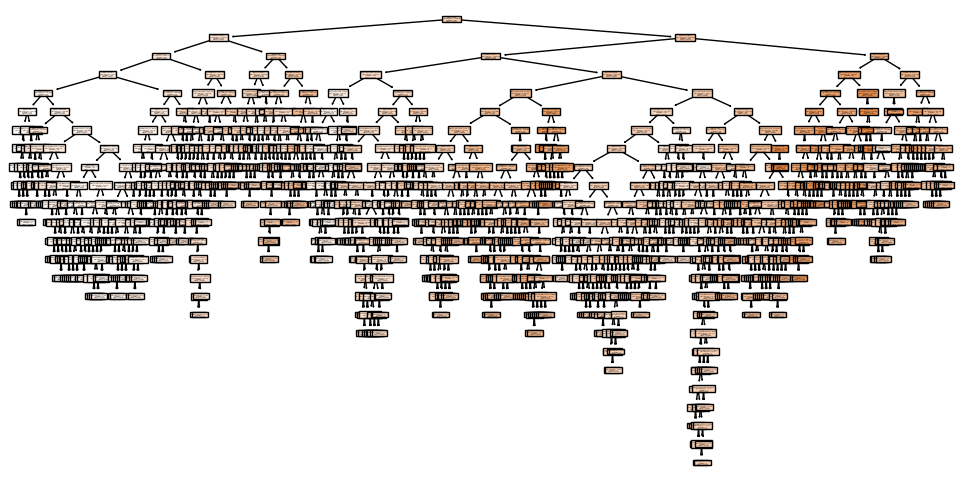

In [13]:
plt.figure(figsize=(12,6))
plot_tree(model1,feature_names=X_train.columns, filled=True);

In [14]:
model2 = DecisionTreeRegressor(max_depth=2, random_state=RANDOM_STATE)
fit_and_test(model2, X_train, y_train, X_test, y_test)

Обучающая выборка - MSE: 139.81, MAE: 9.26, R2 47%.
Тестовая выборка - MSE: 151.16, MAE: 10.00, R2 42%.


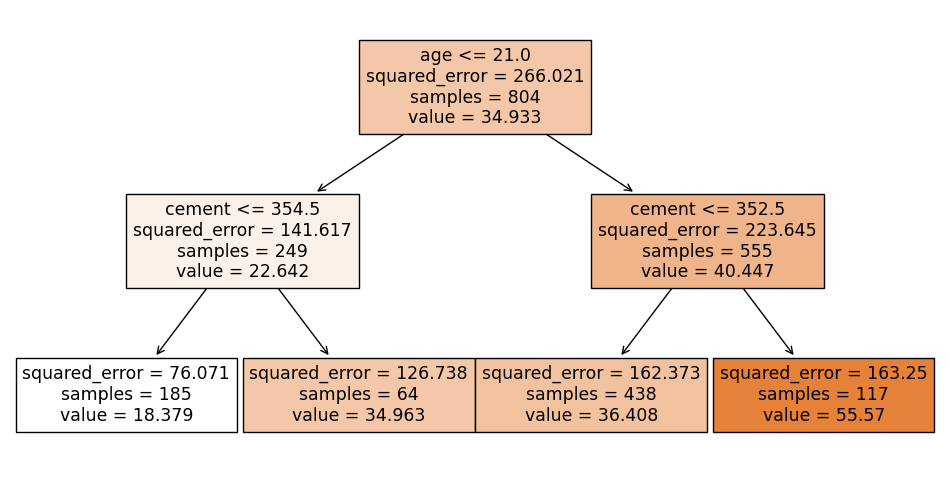

In [15]:
plt.figure(figsize=(12,6))
plot_tree(model2,feature_names=X_train.columns, filled=True);

## Проблема переобучения (overfit)

Оверфит возникает, когда модель учит обучающую выборку слишком тщательно, чтобы обобщить закономерности на дргуие данные. По сути, это значит, что сложность модели сравнима с объемом обучающей выборки. Из формулы MSE, к примеру, можно вывести:

$$
MSE_{train} = {\sigma^2}\left(1-\frac{d}{N}\right)
$$

$$
MSE_{test} = {\sigma^2}\left(1+\frac{d}{N}\right)
$$

Здесь $\sigma^2$ - дисперсия погрешности измерений, $d$ - мера сложности модели, $N$ - размер обучающей выборки ($N \geqslant d$).

Отсюда следует:

- данные с большой погрешностью трудно зафитить и трудно обобщить;
- большую выборку фитить труднее;
- но при этом большая выборка сделает модель точнее на тесте;
- сложную модель легче зафитить;
- но при этом сложной модели труднее обобщать.

Сложность модели определяется не только внутренней механикой, но и предобработкой данных.

## Кросс-валидация

Мы могли бы проверять метрику на тестовой выборке для разных гиперпараметров модели. Однако этим способом мы неминуемо придем к тому, что подстраиваемся под тест.

В качестве альтернативы можно было бы выделять еще одну промежуточную выборку, валидационную. Но тогда мы урезаем количество данных для обучения (либо в конце нам придется склеить выборки обратно и еще раз обучить модель).

Одним из решений является **кросс-валидация**: обучающая выборка разбивается на несколько равных частей, например, четыре. Из них модель обучается на трех, а на оставшейся оценивается. Затем процесс повторяется для всех четырех вариантов и метрика усредняется. Это позволяет неплохо оценить качество модели без влияния случайностей, возможных в отдельной выборке.

In [16]:
model =  DecisionTreeRegressor(random_state=RANDOM_STATE)

In [17]:
from sklearn.model_selection import cross_val_score, cross_validate

In [18]:
cross_val_score(model, X_train, y_train, cv=4, scoring='neg_mean_squared_error')

array([-70.32360854, -51.62410482, -42.3239959 , -68.89218256])

In [19]:
-cross_val_score(model, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean()

58.290972954977875

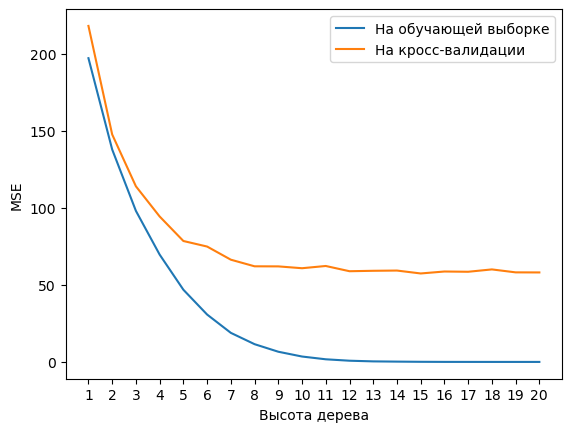

In [20]:
scores = []
train_scores = []

for i in range(1, 21):
    model = DecisionTreeRegressor(max_depth=i, random_state=RANDOM_STATE)
    scores.append(cross_validate(model, X_train, y_train, cv=4, scoring='neg_mean_squared_error', return_train_score=True))
    

mse_train = [-x['train_score'].mean() for x in scores]    
mse_cv = [-x['test_score'].mean() for x in scores]
plt.plot(np.linspace(1, 20, 20), mse_train)
plt.plot(np.linspace(1, 20, 20), mse_cv)
plt.xticks(np.linspace(1, 20, 20))
plt.xlabel('Высота дерева')
plt.ylabel('MSE')
plt.legend(['На обучающей выборке', 'На кросс-валидации']);

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [22]:
model =  DecisionTreeRegressor(random_state=RANDOM_STATE)

In [23]:
tree_params = {
                    'max_depth':range(1, 21),
                    'min_samples_split':range(2, 10),
                    'min_samples_leaf':range(1,10)
              }

In [24]:
gcv = GridSearchCV(model, tree_params, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)
gcv.fit(X_train, y_train)
print(f'Лучшие гиперпараметры: {dict(gcv.best_params_)}')
print(f'MSE: {(-gcv.best_score_):.2f}')
best_model = gcv.best_estimator_

Лучшие гиперпараметры: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 2}
MSE: 55.09


In [25]:
predictions = best_model.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 50.05, MAE: 5.00, R2 81%.


## Bias/variance tradeoff

Ошибку модели можно разложить на смещение (насколько среднее предсказание далеко от истины):

$$
y - \mathbb{E}[y_{pred}]
$$

и дисперсию (разброс диапазона предсказаний):

$$
\mathbb{E}[(y_{pred} - \mathbb{E}[y_{pred}])^2]
$$

Высокая дисперсия модели - показатель переобучения.

Давайте посмотрим, что влияет на эти показатели:

- с ростом обучающей выборки дисперсия снижается, смещение не меняется;
- с ростом сложности модели смещение снижается, дисперсия растет;
- добавление полезных признаков уменьшает смещение;
- удаление бесполезных признаков уменьшает дисперсию.

## Feauture selection

Проводя исследовательский анализ, неплохо проверять связь с целевым признаком. Однако есть и методы, позволяющие оценить связь количественно или даже автоматизировать отбор.

### Embedded methods

Основной представитель встроенных методов - регуляризация, понижающая вес маловажных признаков. Мы знакомы с ней по линейным моделям.

### Wrapper methods

Эти методы обучают модели, добавляя и убавляя признаки, и сравнивают результаты (в том числе используя кросс-валидацию). В `sklearn.feature_selection` они представлены `SequentialFeatureSelector()` и `RFECV`.

Плюсы: весьма надежно.

Минусы: очень затратно.

### Filter methods

Оценивают признаки по некому критерию, позволяя нам выбирать по значимости. Есть много критериев значимости на разные случаи:

Между числовыми признаками: коэффициенты корреляции, F-тест (`sklearn.feature_selection.f_regression()`).

Между категориями: $\chi^2$-тест (`sklearn.feature_selection.chi2()`).

Между разнородными признаками: `scipy.stats.kendalltau()`, дисперсионный анализ, статистические тесты по группам.

Универсальным методом является взаимная информация: она работает и с числами, и с категориями, годится и для регрессии, и для классификации, выявляет любые зависимости, а не только линейные.

In [26]:
from sklearn.feature_selection import mutual_info_regression

In [27]:
mi_scores = mutual_info_regression(X_train, y_train, random_state=RANDOM_STATE)
mic_data = pd.DataFrame()
mic_data['feature'] = X_train.columns
mic_data['MIC'] = mi_scores
  
mic_data.sort_values(by='MIC', ascending=False)

,feature,MIC
7,age,0.286775
3,water,0.266829
0,cement,0.200689
5,coarse_aggregate,0.199592
6,fine_aggregate,0.126826
4,superplasticizer,0.125759
1,blast_furnace_slag,0.125106
2,fly_ash,0.059019


### VIF

На примере линейных моделей мы видели, что сильно коррелирующие признаки раздувают дисперсию модели. Реальное влияние можно оценить с помощью **variance inflation factor**.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
  
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
5,coarse_aggregate,82.994776
3,water,79.938631
6,fine_aggregate,70.589876
0,cement,14.718368
4,superplasticizer,4.982321
2,fly_ash,4.116949
1,blast_furnace_slag,3.371091
7,age,1.710426


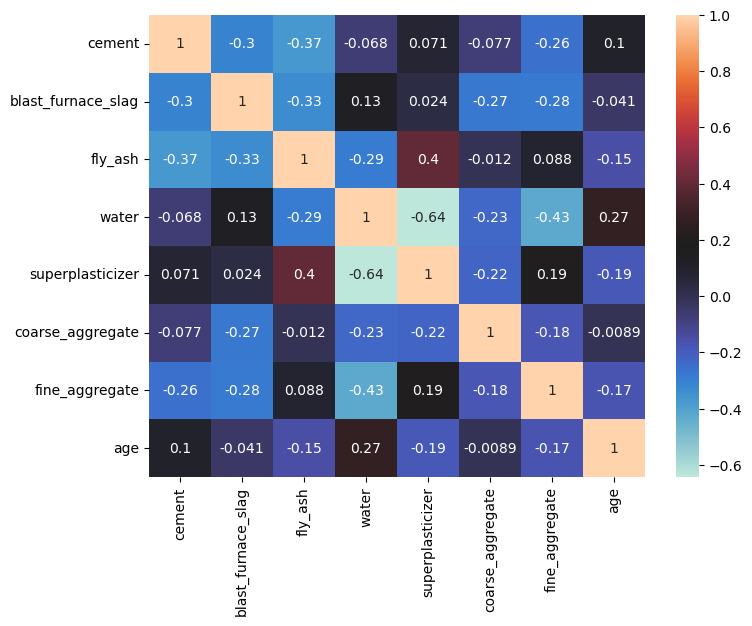

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='icefire');

Как видим, здесь случай тяжелый. Эмпирически, VIF не должен превышать 10-15, но в данном случае нет признаков, зависящих чисто попарно, чтобы один из них выкинуть.

### Понижение размерности

#### Собственные значения и собственные вектора

Предположим, для квадратной матрицы $A$ можно подобрать такой ненулевой вектор $\bar u$, что:

$$
A\bar u = s \bar u
$$

где $s$ - скаляр.

Тогда $\bar u$ называется **собственным вектором (eigenvector)** матрицы $A$, а $s$ - **собственным значением (eigenvalue)** вектора $\bar u$.

У матрицы $N x N$ может быть N собственных векторов и N собственных значений. Иными словами, можно обобщить разложение в матричном виде:

$$
AU = \bar s U
$$

Для симметричной матрицы, такой как матрица ковариации, можно свести это к:

$$
A = U \bar s U^T
$$

Что же можно из этого вывести? Рассмотрим на двумерном примере в пространстве "вода - пластификатор":

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['water', 'superplasticizer']])

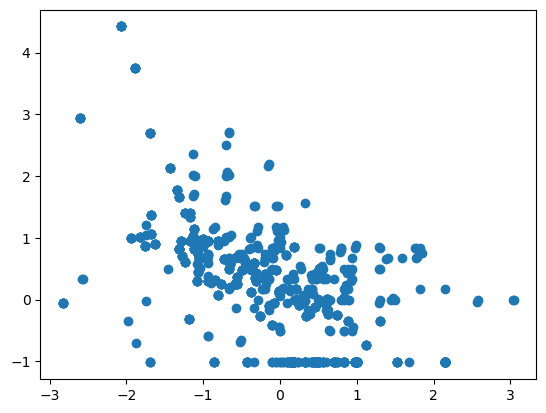

In [32]:
plt.scatter(X[:,0], X[:,1]);

In [33]:
cov_matrix = np.cov(X, rowvar = False)

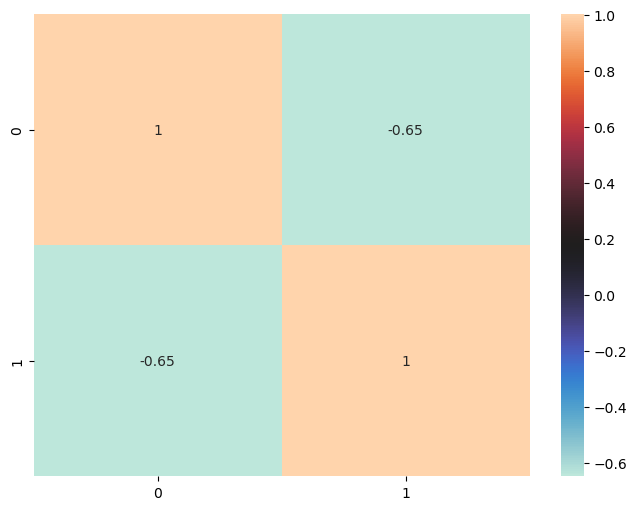

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='icefire');

In [35]:
S, U = np.linalg.eigh(cov_matrix)
print("Собственные значения: \n", S)
print("Собственные вектора: \n", U)

Собственные значения: 
 [0.35347656 1.64851547]
Собственные вектора: 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


**Собственные вектора** такого разложения создадут новый базис, на которой можно спроецировать наши точки:

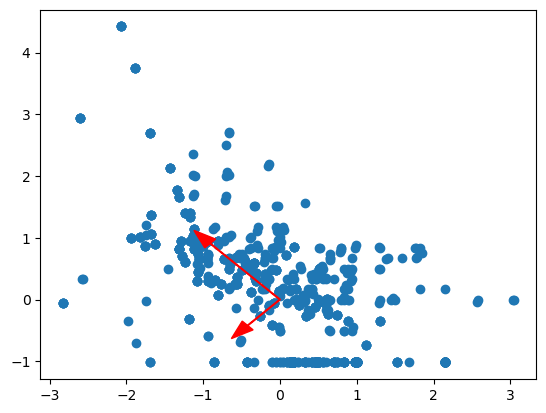

In [36]:
plt.scatter(X[:,0], X[:,1]);

for eigenvalue, eigenvector in zip(S, U.T):
    scaled_eigenvector = eigenvector * eigenvalue ** 0.5
    plt.arrow(X[:,0].mean(), X[:,1].mean(), scaled_eigenvector[0], scaled_eigenvector[1],
              color='r', width=0.01, head_width=0.2)

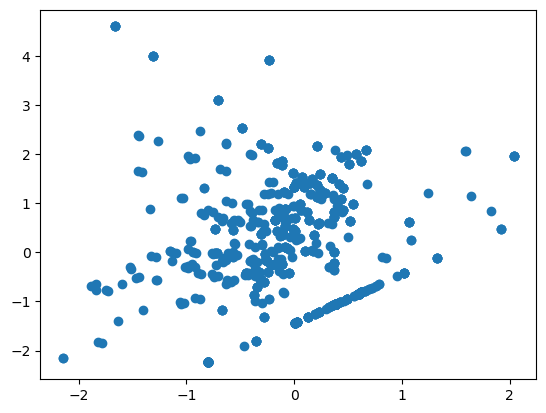

In [37]:
plt.scatter(X @ U[:,0], X @ U[:,1]);

**Собственные значения** соответствуют объясненной дисперсии: чем выше значение, тем важнее соответствующий вектор:

In [38]:
explained_variance = S / (len(X) - 1)
explained_variance / explained_variance.sum()

array([0.17656242, 0.82343758])

Как видим, один из компонентов объясняет более 80% дисперсии, эффективно заменяя два признака!

Этот способ понижения размерности называется **методом главных компонент (Principal Component Analysis).** В sklearn также есть соответствующая функция в нескольких вариантах.

#### PCA в sklearn

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

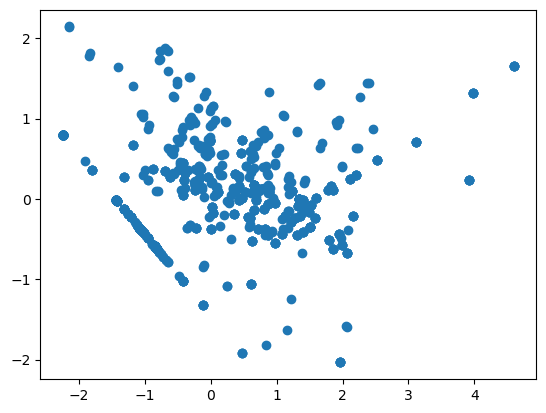

In [41]:
plt.scatter(X_pca[:,0], X_pca[:,1]);

In [42]:
pca.explained_variance_ratio_

array([0.82343758, 0.17656242])

In [43]:
X_train_new = X_train.copy()

In [44]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train[['water', 'coarse_aggregate', 'fine_aggregate']])

In [45]:
X_train_new[['pca1', 'pca2', 'pca3']] = X_pca
X_train_new = X_train_new.drop(['water', 'coarse_aggregate', 'fine_aggregate'], axis=1)

In [46]:
pca.explained_variance_ratio_

array([0.5723555 , 0.40275287, 0.02489164])

In [47]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_new.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(len(X_train_new.columns))]
  
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
3,superplasticizer,5.476891
0,cement,3.022549
2,fly_ash,2.057382
7,pca3,2.007872
1,blast_furnace_slag,1.724822
4,age,1.682397
5,pca1,1.244278
6,pca2,1.159566


## Организуем конвейер

In [48]:
columns_to_merge = ['water', 'coarse_aggregate', 'fine_aggregate']

**Деревянные модели довольно равнодушны к разнице в масштабе признаков (хотя иногда трансформация может помочь).**

In [49]:
# Список скейлеров:
scaler_list = [
               None,
               #MinMaxScaler(),
               StandardScaler(),
               #RobustScaler(),
               PowerTransformer(),
               QuantileTransformer(random_state=RANDOM_STATE, n_quantiles=500),
               QuantileTransformer(random_state=RANDOM_STATE, output_distribution='normal', n_quantiles=500),
              ]

# Предобработка по группам признаков:
transformers = [
                   ("pca", PCA(n_components=2), columns_to_merge),
               ]

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough', n_jobs=-1)

In [126]:
def optimize(model, params, X, y, scoring='neg_mean_squared_error'):
    name = f'{type(model).__name__}'
    print(f'Оптимизация {name}...')
    pipe = Pipeline([
                        ('preprocessor', preprocessor),
                        ('scaler', None),                
                        ('model', model)
                    ])
    gcv = GridSearchCV(pipe, params, cv=4, scoring=scoring, n_jobs=-1)
    gcv.fit(X, y)
    print(f'Лучшие гиперпараметры: {dict(gcv.best_params_)}')
    print(f'MSE: {(-gcv.best_score_):.2f}')
    return gcv.best_estimator_

In [51]:
tree_params = {
                    #'scaler':scaler_list,
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__max_depth':range(1, 21),
                    'model__min_samples_split':range(2, 10),
                    'model__min_samples_leaf':range(1, 10)
              }

In [52]:
best_tree = optimize(DecisionTreeRegressor(random_state=RANDOM_STATE), tree_params, X_train, y_train)

Оптимизация DecisionTreeRegressor...
Лучшие гиперпараметры: {'model__max_depth': 13, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'preprocessor__pca__n_components': 1}
MSE: 53.33


In [53]:
predictions = best_tree.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 38.72, MAE: 4.12, R2 85%.


## Ансамбли деревянных моделей

In [54]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Bagging (bootstrap aggregating)

Этот метод выбирает из обучающей выборки множество подвыборок (с возвращением), а также, в зависимости от реализации, может брать для каждой случайное подмножество признаков. На каждой строится дерево решений, и их результаты усредняются. Это неплохо снижает дисперсию модели:

In [55]:
forest_params = {
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__max_depth' : range(5, 25),
                    'model__n_estimators' : [200],
                    'model__min_samples_split':range(2, 5),
                }

In [56]:
best_forest = optimize(RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1), forest_params, X_train, y_train)

Оптимизация RandomForestRegressor...
Лучшие гиперпараметры: {'model__max_depth': 17, 'model__min_samples_split': 2, 'model__n_estimators': 200, 'preprocessor__pca__n_components': 3}
MSE: 28.19


In [57]:
predictions = best_forest.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 25.35, MAE: 3.59, R2 90%.


### Pasting

Похожий метод, но выборки делаются без возвращения, а ветвление делается случайно, а не по критерию.

In [58]:
best_et = optimize(ExtraTreesRegressor(random_state=RANDOM_STATE, n_jobs=-1), forest_params, X_train, y_train)

Оптимизация ExtraTreesRegressor...
Лучшие гиперпараметры: {'model__max_depth': 19, 'model__min_samples_split': 3, 'model__n_estimators': 200, 'preprocessor__pca__n_components': 3}
MSE: 24.08


In [59]:
predictions = best_et.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 25.27, MAE: 3.13, R2 90%.


### Boosting

В этом варианте деревья выращиваются последовательно, и каждое предсказывает ошибку предыдущего.

In [60]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [61]:
boost_params = {
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__max_depth' : range(1, 10),
                    'model__max_iter' : [200, 500, 1000],
                }

In [62]:
best_hgb = optimize(HistGradientBoostingRegressor(random_state=RANDOM_STATE), boost_params, X_train, y_train)

Оптимизация HistGradientBoostingRegressor...
Лучшие гиперпараметры: {'model__max_depth': 4, 'model__max_iter': 1000, 'preprocessor__pca__n_components': 3}
MSE: 19.41


In [63]:
predictions = best_hgb.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 23.77, MAE: 3.19, R2 91%.


Популярные библиотеки градиентного бустинга:

- XGBoost
- Catboost
- LightGBM

## Ансамбли более высокого уровня

In [64]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

### Голосование

Усредняет предсказания разных моделей, позволяя снизить дисперсию еще сильнее.

In [65]:
voters = [('et', best_et), ('gb', best_hgb)]
vote = VotingRegressor(estimators=voters, n_jobs=-1)

In [66]:
vote.fit(X_train, y_train)

VotingRegressor(estimators=[('et',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('pca',
                                                                               PCA(n_components=3),
                                                                               ['water',
                                                                                'coarse_aggregate',
                                                                                'fine_aggregate'])])),
                                             ('scaler', None),
                                             ('model',
                                              ExtraTreesRegressor(max_depth=19,
                                                                  min_samples_split=3,
                                                                  n_estimators=200,
                                                                  n_jobs=-1,
                                                                  random_state=177013))])),
                            ('gb',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=-1,
                                                                remainder='passthrough',
                                                                transformers=[('pca',
                                                                               PCA(n_components=3),
                                                                               ['water',
                                                                                'coarse_aggregate',
                                                                                'fine_aggregate'])])),
                                             ('scaler', None),
                                             ('model',
                                              HistGradientBoostingRegressor(max_depth=4,
                                                                            max_iter=1000,
                                                                            random_state=177013))]))],
                n_jobs=-1)

In [67]:
predictions = vote.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 21.58, MAE: 2.88, R2 92%.


### Stacking/Blending

Похожие методы, которые используют предсказания отдельных моделей как признаки для метамодели. Как правило, метамодель берется линейная.

In [68]:
stack = StackingRegressor(estimators=voters, final_estimator=LinearRegression(), cv=4, n_jobs=-1)

In [69]:
stack.fit(X_train, y_train)

StackingRegressor(cv=4,
                  estimators=[('et',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(n_jobs=-1,
                                                                  remainder='passthrough',
                                                                  transformers=[('pca',
                                                                                 PCA(n_components=3),
                                                                                 ['water',
                                                                                  'coarse_aggregate',
                                                                                  'fine_aggregate'])])),
                                               ('scaler', None),
                                               ('model',
                                                ExtraTreesRegressor(max_depth=19,
                                                                    min_samples_split=3,
                                                                    n_estimators=200,
                                                                    n_jobs=-1,
                                                                    random_state=177013))])),
                              ('gb',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(n_jobs=-1,
                                                                  remainder='passthrough',
                                                                  transformers=[('pca',
                                                                                 PCA(n_components=3),
                                                                                 ['water',
                                                                                  'coarse_aggregate',
                                                                                  'fine_aggregate'])])),
                                               ('scaler', None),
                                               ('model',
                                                HistGradientBoostingRegressor(max_depth=4,
                                                                              max_iter=1000,
                                                                              random_state=177013))]))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [70]:
predictions = stack.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 21.47, MAE: 2.92, R2 92%.


### Ансамбли классификации на коррекции ошибок

In [206]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(df_titanic.drop(['Survived'], axis=1),
                                                    df_titanic['Survived'],
                                                    test_size=0.2,
                                                    random_state=177013,
                                                    shuffle=True,
                                                    stratify=df_titanic['Survived'],
                                                    )

In [215]:
ecoc = OutputCodeClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE), random_state=RANDOM_STATE, n_jobs=-1)

In [216]:
ecoc_params = {
                    #'scaler':scaler_list,
                    'preprocessor':[None],
                    'model__estimator__max_depth':range(1, 21),
                    'model__estimator__min_samples_split':range(2, 10),
                    'model__estimator__min_samples_leaf':range(1, 10)
              }

In [217]:
best_ecoc = optimize(ecoc, ecoc_params, X_train_t, y_train_t, scoring="balanced_accuracy")

Оптимизация OutputCodeClassifier...
Лучшие гиперпараметры: {'model__estimator__max_depth': 6, 'model__estimator__min_samples_leaf': 9, 'model__estimator__min_samples_split': 2, 'preprocessor': None}
MSE: -0.80


In [218]:
accuracy_score(y_test_t, best_ecoc.predict(X_test_t))

0.8156424581005587

## Другие популярные модели

### Метод ближайших соседей

In [71]:
from sklearn.neighbors import KNeighborsRegressor

**Метод ближайших соседей чувствителен к масштабу. Вам понадобится скейлер.**

In [72]:
knn_params = {
                    'scaler':scaler_list,
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__n_neighbors' : range(1, 10),
                    'model__weights' : ['uniform', 'distance'],
                    'model__metric' :['minkowski', 'cityblock', 'cosine']
    
             }

In [73]:
best_knn = optimize(KNeighborsRegressor(n_jobs=-1), knn_params, X_train, y_train)

Оптимизация KNeighborsRegressor...
Лучшие гиперпараметры: {'model__metric': 'cosine', 'model__n_neighbors': 6, 'model__weights': 'distance', 'preprocessor__pca__n_components': 3, 'scaler': PowerTransformer()}
MSE: 37.21


In [74]:
predictions = best_knn.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 32.56, MAE: 3.62, R2 87%.


Этот метод нетрудно адаптировать для заполнения пропусков в данных:

In [75]:
from sklearn.impute import KNNImputer

In [76]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', add_indicator=True).set_output(transform='pandas')

In [77]:
df_titanic = pd.read_csv('titanic.csv').drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_titanic['Sex'] = (df_titanic['Sex'] == 'male').astype('int')

In [78]:
df_titanic = imputer.fit_transform(df_titanic)

In [79]:
df_titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,missingindicator_Age
886,0.0,2.0,1.0,27.0,0.0,0.0,13.00,0.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.00,0.0
888,0.0,3.0,0.0,26.8,1.0,2.0,23.45,1.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.00,0.0
890,0.0,3.0,1.0,32.0,0.0,0.0,7.75,0.0


### Метод опорных векторов (SVM)

In [80]:
from sklearn.svm import SVR

**Метод опорных векторов также чувствителен к масштабу.**

In [81]:
svr_params = {
                    'scaler':scaler_list,
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                    'model__C':[0.1, 1, 10, 100, 1000, 10000]
             }

In [82]:
best_svr = optimize(SVR(), svr_params, X_train, y_train)

Оптимизация SVR...
Лучшие гиперпараметры: {'model__C': 1000, 'model__epsilon': 0.4, 'preprocessor__pca__n_components': 3, 'scaler': PowerTransformer()}
MSE: 19.76


In [83]:
predictions = best_svr.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 36.61, MAE: 3.45, R2 86%.


### GLM

In [84]:
from sklearn.linear_model import GammaRegressor, TweedieRegressor, PoissonRegressor

Обобщение линейных моделей для разных распределений целевой переменной. Например:

- Нормальное распределение (`power=0`). Сводится к обычной линейной регрессии.
- Распределение Пуассона (`power=1` или `PoissonRegressor()`). Хорошо подходит, если надо предсказать, например, штучное количество.
- Гамма-распределение(`power=2` или `GammaRegressor()`). Обобщение экспоненциального. Подходит, например, для затраченного времени или расходов на событие.
- Обратное нормальному распределение(`power=2`). Для целевых переменных с большим "хвостом".
- Гибрид гамма-Пуассона(`power=1.5`). Например, сумма расходов за год.

In [121]:
tw_params = {
                    'scaler':scaler_list,
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__power':np.linspace(0, 4, 5),
                    'model__alpha':np.logspace(-6, 2, 9),
               }

In [122]:
best_tw = optimize(TweedieRegressor(), tw_params, X_train, y_train)

Оптимизация TweedieRegressor...
Лучшие гиперпараметры: {'model__alpha': 0.0001, 'model__power': 0.0, 'preprocessor__pca__n_components': 3, 'scaler': QuantileTransformer(n_quantiles=500, random_state=177013)}
MSE: 50.23


In [123]:
predictions = best_tw.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 58.07, MAE: 6.12, R2 78%.


### Кригинг

In [248]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [287]:
krig_params = {
                    'scaler':scaler_list,
                    'preprocessor__pca__n_components':[1, 2, 3],
                    #'model__alpha': np.logspace(-10, 1, 12),
                    'model__normalize_y' :[True, False],
    
             }

In [338]:
best_krig = optimize(GaussianProcessRegressor(random_state=RANDOM_STATE, alpha=0.1), krig_params, X_train, y_train)

Оптимизация GaussianProcessRegressor...
Лучшие гиперпараметры: {'model__normalize_y': True, 'preprocessor__pca__n_components': 3, 'scaler': PowerTransformer()}
MSE: 31.62


In [299]:
predictions = best_krig.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 31.05, MAE: 3.51, R2 88%.


In [300]:
for n, (mean, std) in enumerate(zip(*best_krig.predict(X_test, return_std=True))):
    print(f'{mean} ± {std * 1.96} vs {y_test.iloc[n]}')
    if n >=10:
        break

41.94126719330109 ± 9.500174452496323 vs 41.36856
29.412025972781905 ± 29.890092916028888 vs 49.249270679999995
38.012878107172156 ± 9.919793800134444 vs 34.67374804
63.00840214559353 ± 11.653976275107409 vs 67.30664712
29.241368754567553 ± 6.99202075479623 vs 28.98557104
13.995122258744619 ± 13.043505687149441 vs 12.788400847999998
29.455523375265972 ± 14.460007363825639 vs 28.096147
35.044329336224074 ± 16.929949887181 vs 22.489328168
37.38647467577908 ± 7.401059549019471 vs 38.610656
36.2852256329065 ± 5.074018334659344 vs 38.21075992
73.20499975485183 ± 6.634217346192796 vs 77.29715436


In [339]:
from sklearn.metrics import make_scorer

In [382]:
def interval_hit(estimator, X, y):
    mean, std = estimator.predict(X, return_std=True)
    lower_bound = mean - std * 1.96
    upper_bound = mean + std * 1.96
    return np.mean((lower_bound <= y) & (y <= upper_bound))

In [383]:
def optimize_for_hit(model, params, X, y):
    name = f'{type(model).__name__}'
    print(f'Оптимизация {name}...')
    pipe = Pipeline([
                        ('preprocessor', preprocessor),
                        ('scaler', None),                
                        ('model', model)
                    ])
    gcv = GridSearchCV(pipe, params, cv=4, scoring=interval_hit, n_jobs=-1)
    gcv.fit(X, y)
    print(f'Лучшие гиперпараметры: {dict(gcv.best_params_)}')
    print(f'Попаданий в интервал: {(gcv.best_score_):.2%}')
    return gcv.best_estimator_

In [384]:
krig_params = {
                    'scaler':scaler_list,
                    'preprocessor__pca__n_components':[1, 2, 3],
                    'model__alpha': np.logspace(-10, 2, 13),
                    'model__normalize_y' :[True, False],
    
             }

In [385]:
best_krig = optimize_for_hit(GaussianProcessRegressor(random_state=RANDOM_STATE), krig_params, X_train, y_train)

Оптимизация GaussianProcessRegressor...
Лучшие гиперпараметры: {'model__alpha': 1.0, 'model__normalize_y': True, 'preprocessor__pca__n_components': 3, 'scaler': PowerTransformer()}
Попаданий в интервал: 98.51%


In [386]:
predictions = best_krig.predict(X_test)
mse = mean_squared_error (y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Тестовая выборка - MSE: {mse:.2f}, MAE: {mae:.2f}, R2 {r2:.0%}.')

Тестовая выборка - MSE: 39.13, MAE: 4.30, R2 85%.


In [387]:
interval_hit(best_krig, X_test, y_test)

0.9900497512437811

In [388]:
for n, (mean, std) in enumerate(zip(*best_krig.predict(X_test, return_std=True))):
    print(f'{mean} ± {std * 1.96} vs {y_test.iloc[n]}')
    if n >=10:
        break

43.7848392549823 ± 21.555700145755367 vs 41.36856
30.691891278907715 ± 30.544212969353183 vs 49.249270679999995
35.007024930294335 ± 17.68929697705994 vs 34.67374804
57.99533591952705 ± 20.13736592692384 vs 67.30664712
29.15730262478667 ± 13.241819461409571 vs 28.98557104
17.243171872630256 ± 19.50202094348633 vs 12.788400847999998
32.690175936654455 ± 21.26520380268787 vs 28.096147
32.06525460755225 ± 21.105621980661613 vs 22.489328168
37.011443567558025 ± 15.144495107779028 vs 38.610656
35.29603615970662 ± 10.746199593702585 vs 38.21075992
72.1633726069619 ± 13.042140762658034 vs 77.29715436


### Наивный Байес

In [139]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [140]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(df_titanic.drop(['Survived'], axis=1),
                                                    df_titanic['Survived'],
                                                    test_size=0.2,
                                                    random_state=177013,
                                                    shuffle=True,
                                                    stratify=df_titanic['Survived'],
                                                    )

In [141]:
nb = GaussianNB().fit(X_train_t, y_train_t)

In [142]:
accuracy_score(y_test_t, nb.predict(X_test_t))

0.7430167597765364

## Feature importance

К определению итоговой важности признаков есть несколько подходов:

1. Признаки, которые модель чаще использовала для обобщения при учебе. У многих классов моделей есть свойство `feature_importances_`.

In [404]:
mdi_importances = pd.Series(best_forest['model'].feature_importances_, index=best_forest[:-1].get_feature_names_out())

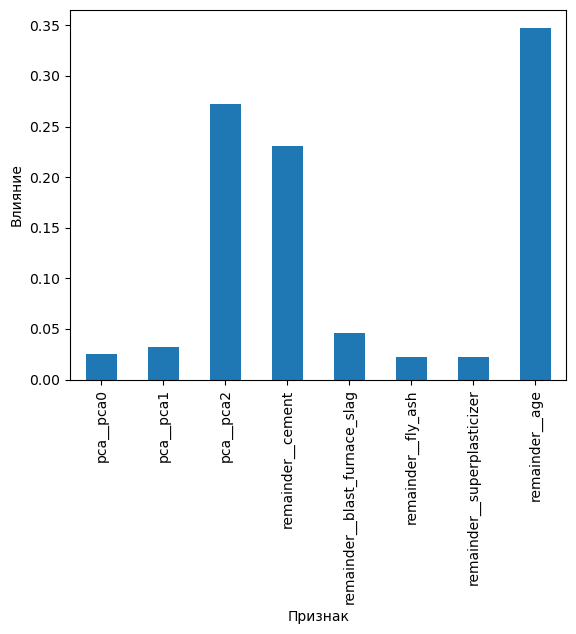

In [395]:
mdi_importances.plot(kind='bar');
plt.xlabel('Признак')
plt.ylabel('Влияние');

Недостаток подхода в том, что признаки с большой кардинальностью получают больший вес. Кроме того, понижение размерности не позволяет судить об изначальном влиянии.

2. Признаки, которые сильнее всего влияют на метрику.

In [405]:
from sklearn.inspection import permutation_importance

In [424]:
perm_importances = pd.Series(permutation_importance(best_forest, X_test, y_test, random_state=RANDOM_STATE, scoring='r2', n_jobs=-1)['importances_mean'], index=X_test.columns)

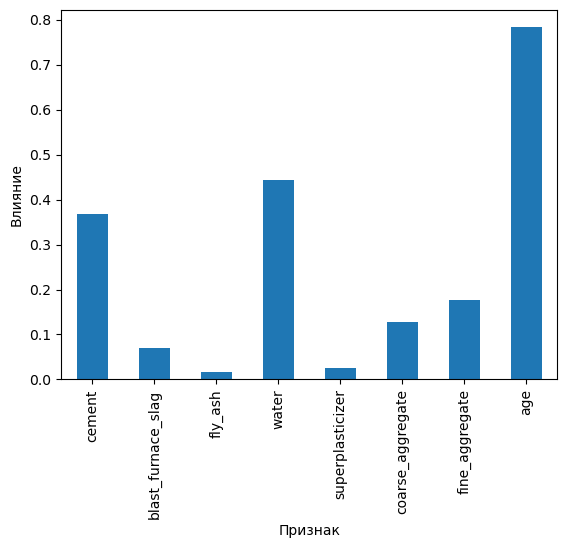

In [425]:
perm_importances.plot(kind='bar');
plt.xlabel('Признак')
plt.ylabel('Влияние');

2. Признаки, которые сильнее всего влияют на предсказание (не обязательно корректное).

In [430]:
np.bool = bool

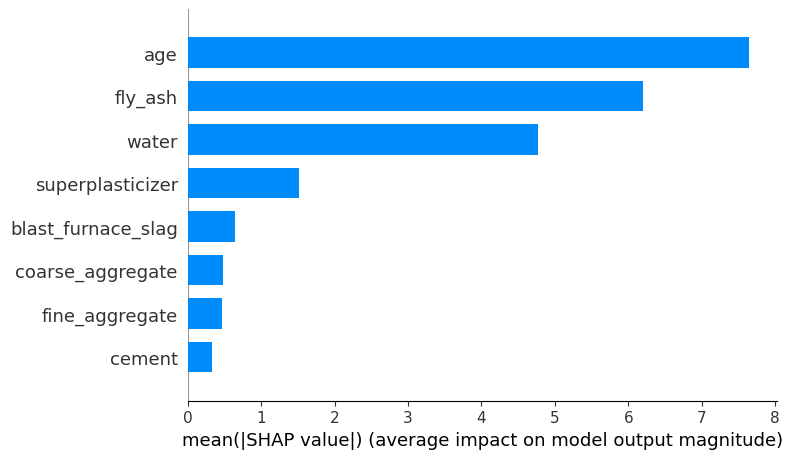

In [432]:
import shap

explainer = shap.Explainer(best_forest.named_steps['model'])
X = best_forest.named_steps['preprocessor'].transform(X_test)
shap_values = explainer(X)

# Plot the summary plot of SHAP values
shap.summary_plot(shap_values, X, feature_names=X_test.columns, plot_type='bar')

## Сохранение и загрузка обученных моделей

Через joblib (рекомендуется):

In [360]:
from joblib import dump, load
dump(nb, 'nb.joblib') 

['nb.joblib']

In [361]:
clf = load('nb.joblib') 

In [362]:
clf.predict([[2.0, 1.0, 27.0, 0.0, 0.0, 13.00, 0.0]])

/home/daiyousei/.conda/envs/DS310/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0.])

Через pickle:

In [370]:
import pickle
s = pickle.dumps(clf)

In [373]:
with open('nb.pickle', 'wb') as file:
    pickle.dump(nb, file)

In [374]:
with open('nb.pickle', 'rb') as file:
    clf2 = pickle.load(file)

In [375]:
clf2.predict([[2.0, 1.0, 27.0, 0.0, 0.0, 13.00, 0.0]])

/home/daiyousei/.conda/envs/DS310/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0.])

# Домашненее задание

## Easy

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df_titanic = pd.read_csv('titanic.csv')

Оцените взаимную информацию, VIF и корреляции в датасете "Титаник". Для этого нужно сперва удалить ненужные столбцы, а оставшиеся категории превратить в числа.

Обратите внимание, что это задача классификации на целевой признак `Survived`, а значит, вам нужен `mutual_info_classif()`, а не `mutual_info_regressor()`.

In [433]:
# Ваш код ниже:


## Normal/Hard

Вам предстоит построить конвейер sklearn, проводящий классификацию в датасете "Титаник". Если вы не сможете выполнить все условия, обойдите их более простыми способами (например, удаляйте пропуски, а не заполняйте; если вам не удается подобрать гиперпараметры, обучите конвейер с параметрами модели по умолчанию и т. д.). Наивысшую оценку получат работы, выполнившие все пункты.

Для начала выделите тестовую и обучающую выборки.

Конвейер должен проводить следующие действия:

- выбросить ненужные столбцы;
- заполнить пропуски с помощью `KNNImputer()`;
- отмасштабировать данные, если это нужно для модели;
- содержать на выходе модель классификации по вашему выбору.

Подберите наилучшие параметры конвейера (в идеале не только модели, но и, например, импутера) с помощью `GridSearchCV` или `RandomizedSearchCV`.

Проверьте результат на тестовой выборке. Сделайте вывод.

Сохраните конвейер в файл и загрузите его вместе с тетрадью.

In [434]:
# Ваш код ниже:
